In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import librosa
import librosa.display
from pydub import AudioSegment
from pydub.playback import play
import pathlib
from pathlib import Path
import seaborn as sns
import random
import matplotlib.pyplot as plt

C:\Users\erezm\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Getting sample paths

In [3]:
actual_data_dir = pathlib.Path(".\cutted_files")


car_noises = [str(item) for item in actual_data_dir.glob('*.*')]
car_noises.sort(key = lambda x: int(x[x.rfind('e')+1:x.rfind('.')]))

In [4]:
df = pd.read_csv('labels.csv')
df.head(100)

,file_path,class
0,data/additional/car/auto_30kph_pass1_1.wav,0
1,data/additional/car/auto_30kph_pass2_1.wav,0
2,data/additional/car/auto_30kph_pass3_1.wav,0
3,data/additional/car/auto_50kph_pass1_1.wav,0
4,data/additional/car/auto_50kph_pass2_1.wav,0
...,...,...
95,cutted_files/VehicleNoise37.wav,1
96,cutted_files/VehicleNoise38.wav,0
97,cutted_files/VehicleNoise39.wav,0
98,cutted_files/VehicleNoise40.wav,1


In [5]:
car_noises = list(df['file_path'])

Getting list of duration of samples

In [7]:
durations = []
for x in car_noises:
    song = AudioSegment.from_wav(x)
    durations.append(float(format(song.duration_seconds, '.1f')))
    #print(float(format(song.duration_seconds, '.1f')))

In [8]:
print(durations)

[18.8, 21.2, 17.1, 17.8, 16.6, 15.0, 17.8, 21.7, 12.6, 13.7, 15.2, 12.5, 14.0, 16.3, 17.9, 18.0, 16.1, 11.9, 20.3, 15.7, 21.7, 14.8, 19.4, 14.4, 10.1, 17.1, 12.1, 16.6, 11.6, 15.9, 9.4, 11.2, 15.1, 9.2, 16.9, 17.1, 11.9, 17.0, 14.1, 16.9, 14.6, 16.9, 15.0, 17.3, 17.6, 16.8, 28.5, 16.8, 17.4, 12.6, 15.8, 13.3, 19.2, 43.2, 17.8, 11.2, 11.8, 10.7, 5.1, 3.0, 2.4, 2.0, 4.5, 4.8, 6.7, 6.2, 3.2, 4.5, 4.5, 4.5, 4.8, 4.0, 2.9, 2.9, 4.2, 3.5, 4.6, 4.2, 13.0, 4.9, 3.9, 8.0, 9.3, 4.0, 5.3, 2.8, 4.0, 6.0, 3.8, 4.9, 4.4, 6.6, 4.8, 3.6, 4.6, 4.4, 3.4, 4.7, 3.6, 4.6, 4.0, 3.7, 2.7, 9.6, 4.5, 4.6, 5.8, 3.7, 4.1, 4.2, 4.3, 5.0, 5.3, 7.3, 3.3, 4.0, 4.7, 7.8, 3.8, 4.3, 6.0, 4.5, 5.5, 6.9, 6.3, 4.5, 4.6, 4.3, 5.2, 3.3, 4.4, 3.8, 5.3, 6.4, 6.4, 4.0, 3.7, 4.7, 6.7, 5.0, 5.3, 4.6, 4.1, 5.4, 7.3, 5.1, 7.0, 5.8, 4.2, 4.2, 5.9, 6.5, 4.4, 3.7, 4.2, 4.2, 4.6, 6.8, 6.9, 8.7, 3.8, 4.7, 7.3, 8.6, 8.5, 7.0, 4.9, 5.4, 4.4, 5.8, 6.1, 7.2, 5.2, 6.0, 3.2, 6.4, 5.9, 5.7, 3.0, 4.6, 8.4, 6.0, 6.2, 3.5, 5.8, 4.8, 3.7, 3.4, 7.

C:\Users\erezm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

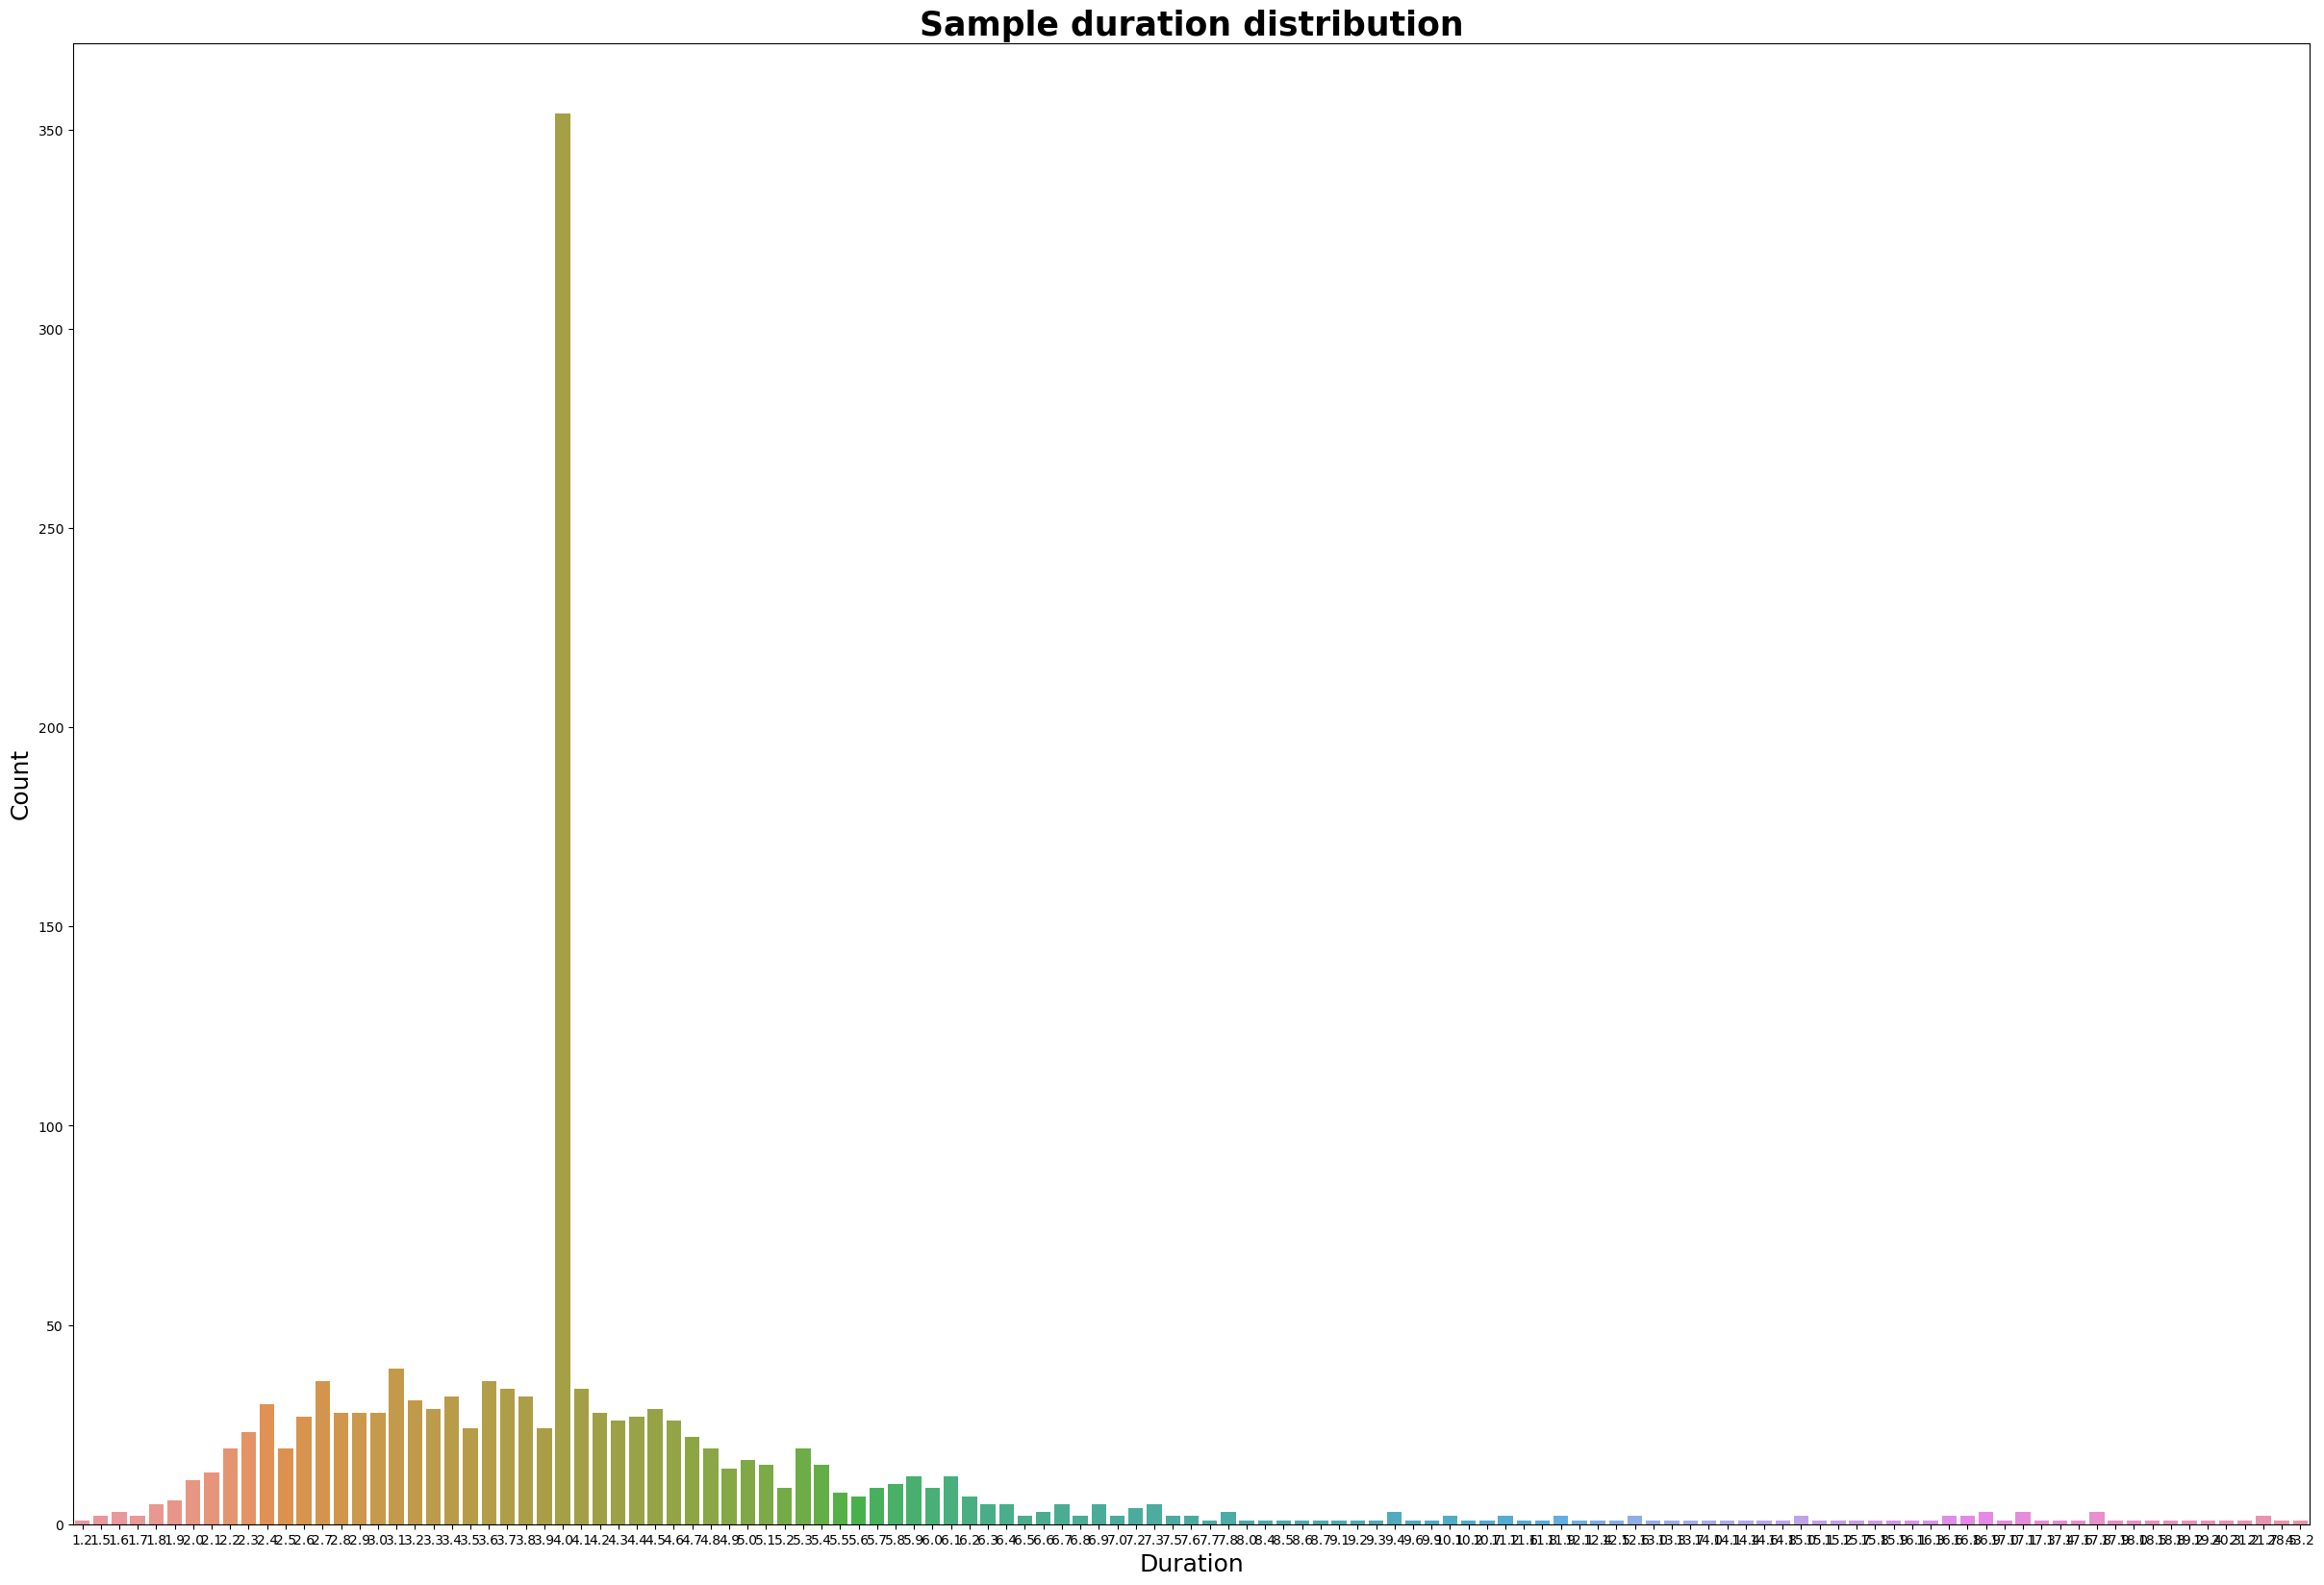

In [9]:
df = pd.DataFrame(durations)
df
plt.figure(figsize=(30,20))
fig = sns.countplot(df[0])
fig.set_title('Sample duration distribution', fontsize=25, fontweight='bold',)
fig.set_xlabel('Duration', fontsize=18)
fig.set_ylabel('Count', fontsize=18)

Cutting samples longer than 6 seconds and adding silence to shorter samples

In [10]:
max_duration = 6
for x in car_noises:
    song = AudioSegment.from_wav(x)
    current_duration = song.duration_seconds
    
    if(current_duration < max_duration):
        padding = (max_duration - current_duration) / 2
        silence = AudioSegment.silent(duration=(padding*1000))
        song = silence + song + silence
    else:
        diff = (current_duration - max_duration)/2
        #print(diff)
        song = song[diff*1000: current_duration*1000 - diff*1000]
    name = x[x.rfind('/')+1 : ]
    path = f'.\\new_cutted_files\{name}'
    song.export(path, format="wav")
    

In [11]:
actual_data_dir = pathlib.Path(".\\new_cutted_files")


cutted_car_noises = [str(item) for item in actual_data_dir.glob('*.*')]
#cutted_car_noises.sort(key = lambda x: int(x[x.rfind('e')+1:x.rfind('.')]))

#cutted_car_noises

In [12]:
durations = []
for x in cutted_car_noises:
    song = AudioSegment.from_wav(x)
    durations.append(float(format(song.duration_seconds, '.1f')))
    #print(float(format(song.duration_seconds, '.1f')))

C:\Users\erezm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

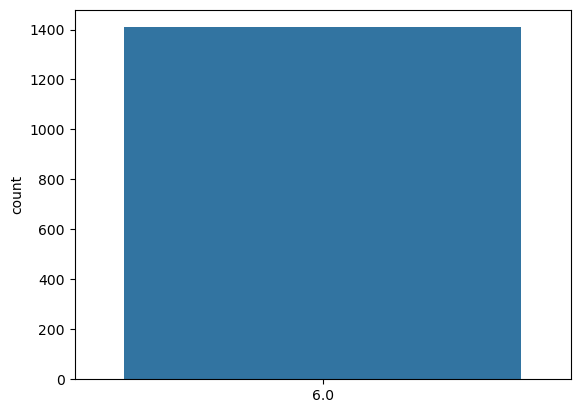

In [13]:
sns.countplot(durations)

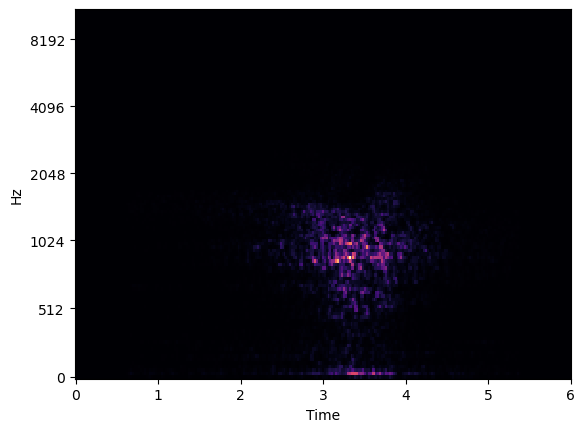

In [14]:
shapes1 = []
shapes2 = []
for x in cutted_car_noises:
    y, sr = librosa.load(x, duration=max_duration)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(ps, y_axis='mel', x_axis='time')
    #print(x)
    #print(ps.shape)
    shapes1.append(ps.shape[0])
    shapes2.append(ps.shape[1])

C:\Users\erezm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

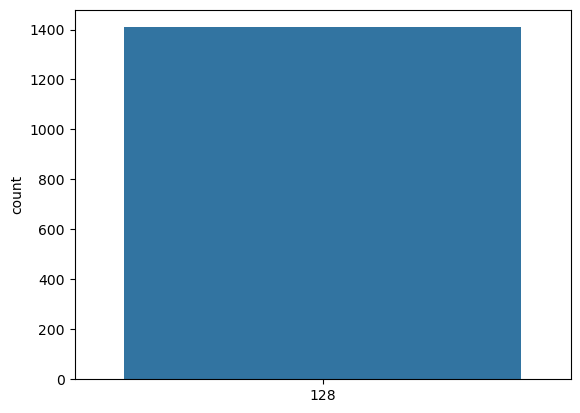

In [15]:
sns.countplot(shapes1)

C:\Users\erezm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

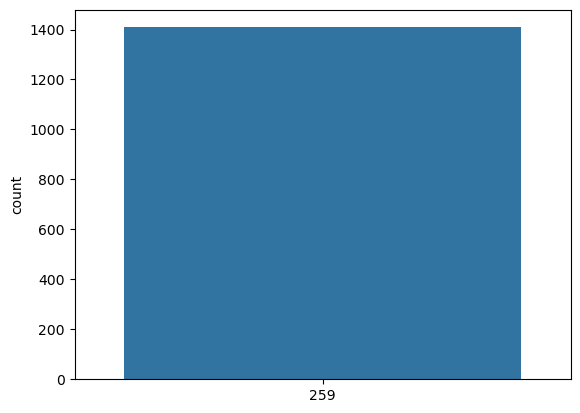

In [16]:
sns.countplot(shapes2)

In [17]:
df = pd.read_csv('labels.csv')
#df['file_path'] = cutted_car_noises
df

,file_path,class
0,data/additional/car/auto_30kph_pass1_1.wav,0
1,data/additional/car/auto_30kph_pass2_1.wav,0
2,data/additional/car/auto_30kph_pass3_1.wav,0
3,data/additional/car/auto_50kph_pass1_1.wav,0
4,data/additional/car/auto_50kph_pass2_1.wav,0
...,...,...
1404,cutted_files/VehicleNoise1346.wav,0
1405,cutted_files/VehicleNoise1347.wav,1
1406,cutted_files/VehicleNoise1348.wav,0
1407,cutted_files/VehicleNoise1349.wav,0


In [18]:

df = pd.read_csv('labels.csv')
file_paths = []
for row in df.itertuples():
    new_path = row.file_path[row.file_path.rfind('/')+1:]
    new_path = "new_cutted_files/" + new_path
    file_paths.append(new_path)

df['file_path'] = file_paths
df

,file_path,class
0,new_cutted_files/auto_30kph_pass1_1.wav,0
1,new_cutted_files/auto_30kph_pass2_1.wav,0
2,new_cutted_files/auto_30kph_pass3_1.wav,0
3,new_cutted_files/auto_50kph_pass1_1.wav,0
4,new_cutted_files/auto_50kph_pass2_1.wav,0
...,...,...
1404,new_cutted_files/VehicleNoise1346.wav,0
1405,new_cutted_files/VehicleNoise1347.wav,1
1406,new_cutted_files/VehicleNoise1348.wav,0
1407,new_cutted_files/VehicleNoise1349.wav,0


C:\Users\erezm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'Car'), Text(1, 0, 'Truck'), Text(2, 0, 'Motorcycle')]]

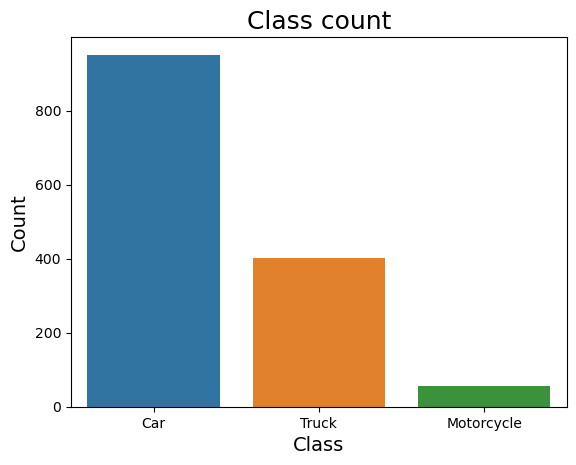

In [21]:
fig = sns.countplot(df['class'])
fig.set_title('Class count', fontsize=18)
fig.set_xlabel('Class', fontsize=14)
fig.set_ylabel('Count', fontsize=14)
fig.set(xticklabels=["Car", "Truck", "Motorcycle"])

Define input type

In [41]:
#input_type = "Spectrograms"
input_type = "MFCCs"

Create Spectrogram

In [42]:
if input_type == "Spectrograms":
    X = []
    y = []

    for row in df.itertuples():
        signal, sr = librosa.load(row.file_path, duration=max_duration)  
        ps = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=1024)
        if ps.shape != (128, 259): continue
        X.append(ps.reshape( (ps.shape[0], ps.shape[1], 1) ))
        y.append(keras.utils.to_categorical(row._2, 3))

Create MFCC

In [43]:
if input_type == "MFCCs":
    FRAME_SIZE=1024
    HOP_SIZE=512

    X = []
    y = []
    shapes1 = []
    shapes2 = []
    for row in df.itertuples():
        signal, sr = librosa.load(row.file_path, duration=max_duration)  
        ps = librosa.feature.mfcc(y=signal, sr=sr, n_fft = FRAME_SIZE, hop_length = HOP_SIZE, n_mfcc = 128)
        shapes1.append(ps.shape[0])
        shapes2.append(ps.shape[1])
        if ps.shape != (128, 259): continue
        X.append(ps.reshape( (ps.shape[0], ps.shape[1], 1) ))
        y.append(keras.utils.to_categorical(row._2, 3))

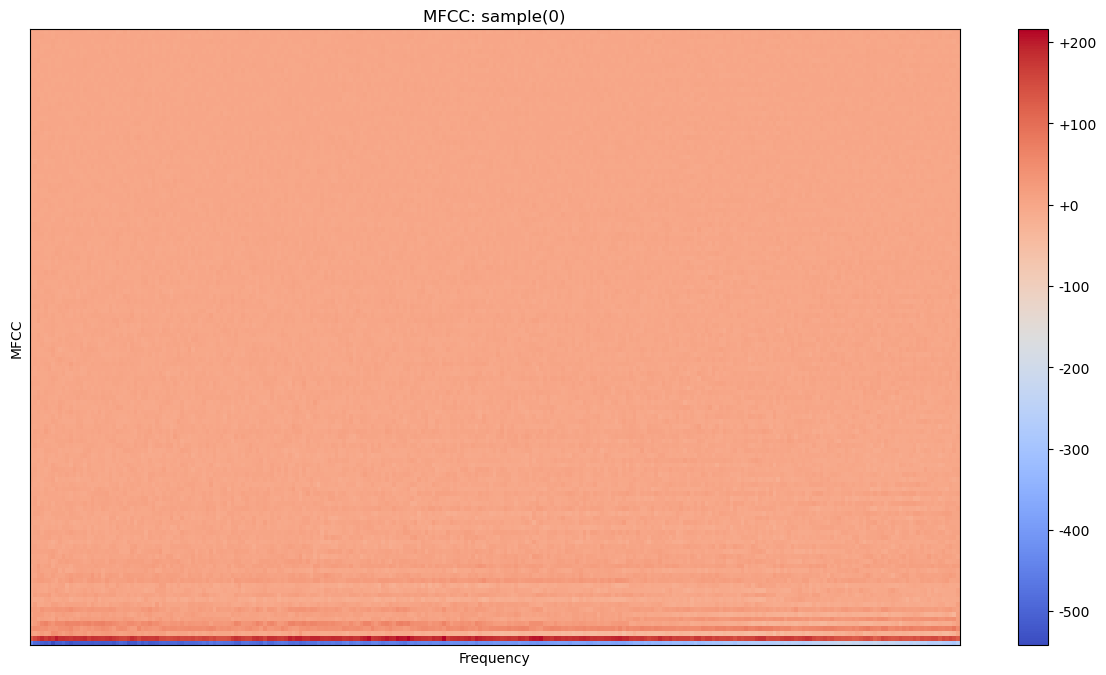

In [44]:
if input_type == "MFCCs":  
    fig=plt.figure(figsize=(15, 8))
    librosa.display.specshow(X[0].reshape(ps.shape[0], ps.shape[1]), sr=sr, hop_length=HOP_SIZE)
    plt.xlabel("Frequency")
    plt.ylabel("MFCC")
    plt.title(f'MFCC: sample({0})')
    plt.colorbar(format="%+2.f")

Create training, validation, test sets

In [45]:
trn_idx = list(np.arange(0, len(X)))
random.seed(7)
random.shuffle(trn_idx)
test_idx = trn_idx[910:]
trn_idx = trn_idx[:910]
X = np.array(X)
y= np.array(y)

val_dex = test_idx[195:]
test_idx = test_idx[:195]
len(test_idx)


195

In [46]:
X_train = X[trn_idx]
y_train = y[trn_idx]

X_test = X[test_idx]
y_test = y[test_idx]

X_val = X[val_dex]
y_val = y[val_dex]

In [47]:
X.shape

(1409, 128, 259, 1)

In [48]:
y_train[0]

array([0., 1., 0.], dtype=float32)

Create CNN Model

In [49]:
import tensorflow_addons as tfa

In [50]:
model = Sequential()
input_shape=(128, 259, 1)

model.add(Conv2D(24, (7, 7), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((3, 3), strides=(3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(48, (7, 7), padding="same"))
model.add(MaxPooling2D((3, 3), strides=(3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3), padding="same"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(3))
model.add(Activation('softmax'))

In [51]:
model.compile( 
                optimizer="Adam", 
              loss="categorical_crossentropy",
              metrics=['accuracy', tfa.metrics.F1Score(average='macro', num_classes=3)])

history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 15s 511ms/step - loss: 1.6270 - accuracy: 0.5978 - f1_score: 0.3514 - val_loss: 0.7279 - val_accuracy: 0.6612 - val_f1_score: 0.2653
Epoch 2/100
29/29 [==============================] - 15s 505ms/step - loss: 0.7438 - accuracy: 0.6429 - f1_score: 0.2947 - val_loss: 0.7385 - val_accuracy: 0.6612 - val_f1_score: 0.2680
Epoch 3/100
29/29 [==============================] - 14s 486ms/step - loss: 0.6738 - accuracy: 0.6945 - f1_score: 0.3906 - val_loss: 0.5521 - val_accuracy: 0.7138 - val_f1_score: 0.3754
Epoch 4/100
29/29 [==============================] - 16s 538ms/step - loss: 0.5691 - accuracy: 0.7604 - f1_score: 0.5884 - val_loss: 0.4821 - val_accuracy: 0.7928 - val_f1_score: 0.5328
Epoch 5/100
29/29 [==============================] - 15s 514ms/step - loss: 0.5196 - accuracy: 0.7934 - f1_score: 0.6596 - val_loss: 0.4368 - val_accuracy: 0.8388 - val_f1_score: 0.7610
Epoch 6/100
29/29 [==============================] - 14s 492ms/step - 

Epoch 45/100
29/29 [==============================] - 15s 523ms/step - loss: 0.1256 - accuracy: 0.9582 - f1_score: 0.9570 - val_loss: 0.4556 - val_accuracy: 0.8421 - val_f1_score: 0.7849
Epoch 46/100
29/29 [==============================] - 15s 518ms/step - loss: 0.1531 - accuracy: 0.9385 - f1_score: 0.9234 - val_loss: 0.3959 - val_accuracy: 0.8651 - val_f1_score: 0.8108
Epoch 47/100
29/29 [==============================] - 14s 488ms/step - loss: 0.1293 - accuracy: 0.9615 - f1_score: 0.9462 - val_loss: 0.4357 - val_accuracy: 0.8717 - val_f1_score: 0.8485
Epoch 48/100
29/29 [==============================] - 14s 470ms/step - loss: 0.1161 - accuracy: 0.9538 - f1_score: 0.9524 - val_loss: 0.5529 - val_accuracy: 0.8816 - val_f1_score: 0.8364
Epoch 49/100
29/29 [==============================] - 14s 471ms/step - loss: 0.0923 - accuracy: 0.9648 - f1_score: 0.9618 - val_loss: 0.4574 - val_accuracy: 0.8289 - val_f1_score: 0.8123
Epoch 50/100
29/29 [==============================] - 14s 471ms/s

Epoch 89/100
29/29 [==============================] - 13s 462ms/step - loss: 0.1147 - accuracy: 0.9637 - f1_score: 0.9396 - val_loss: 0.5353 - val_accuracy: 0.8388 - val_f1_score: 0.8167
Epoch 90/100
29/29 [==============================] - 13s 462ms/step - loss: 0.0557 - accuracy: 0.9846 - f1_score: 0.9830 - val_loss: 0.6371 - val_accuracy: 0.8355 - val_f1_score: 0.8159
Epoch 91/100
29/29 [==============================] - 13s 461ms/step - loss: 0.0330 - accuracy: 0.9890 - f1_score: 0.9864 - val_loss: 0.7809 - val_accuracy: 0.8651 - val_f1_score: 0.8577
Epoch 92/100
29/29 [==============================] - 13s 462ms/step - loss: 0.0553 - accuracy: 0.9769 - f1_score: 0.9680 - val_loss: 0.7065 - val_accuracy: 0.8487 - val_f1_score: 0.8236
Epoch 93/100
29/29 [==============================] - 13s 466ms/step - loss: 0.0334 - accuracy: 0.9879 - f1_score: 0.9858 - val_loss: 0.8193 - val_accuracy: 0.8289 - val_f1_score: 0.8165
Epoch 94/100
29/29 [==============================] - 13s 463ms/s

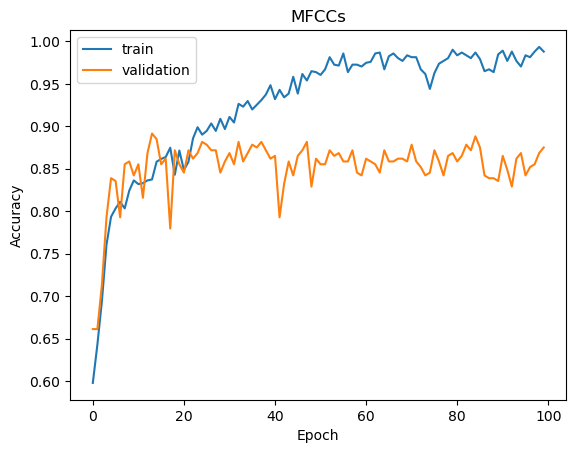

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(input_type)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig('figures/plot.png')

Test loss: 0.8717948794364929


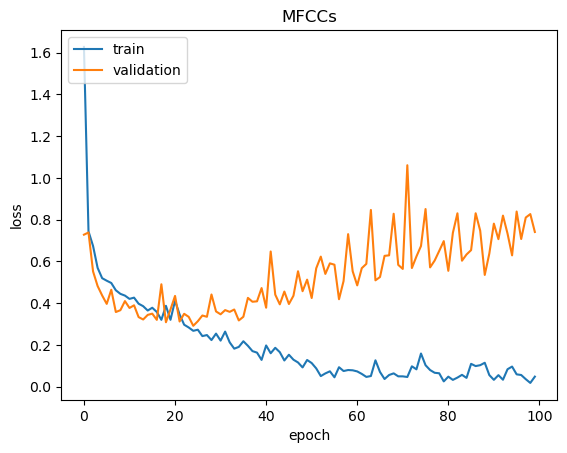

In [53]:
print('Test loss:', score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(input_type)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


plt.savefig('figures/plot_loss.png')

Test loss: 0.8717948794364929


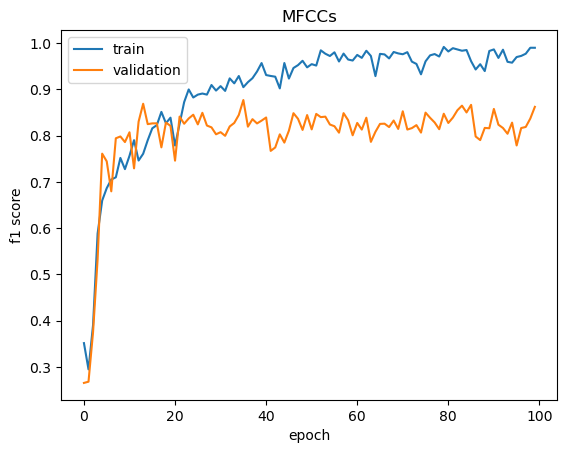

In [54]:
print('Test loss:', score[1])
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title(input_type)
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


plt.savefig('figures/plot_f1.png')

In [55]:
from sklearn.metrics import confusion_matrix
print("Results using", input_type)
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1) 
y_testt=np.argmax(y_test, axis=1)
result = confusion_matrix(y_testt, y_pred , normalize='pred')
print(result)

Results using MFCCs
7/7 [==============================] - 1s 65ms/step
[[0.9020979  0.14583333 0.        ]
 [0.09090909 0.8125     0.        ]
 [0.00699301 0.04166667 1.        ]]


In [56]:
from sklearn.metrics import f1_score
print(f1_score(y_testt, y_pred, average='macro'))
print(f1_score(y_testt, y_pred, average='micro'))
print(f1_score(y_testt, y_pred, average='weighted'))

0.8106679700228087
0.882051282051282
0.8790479484673033


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_testt, y_pred, target_names=['car', 'truck', 'motorcycle']))

              precision    recall  f1-score   support

         car       0.90      0.95      0.92       136
       truck       0.81      0.75      0.78        52
  motorcycle       1.00      0.57      0.73         7

    accuracy                           0.88       195
   macro avg       0.90      0.76      0.81       195
weighted avg       0.88      0.88      0.88       195



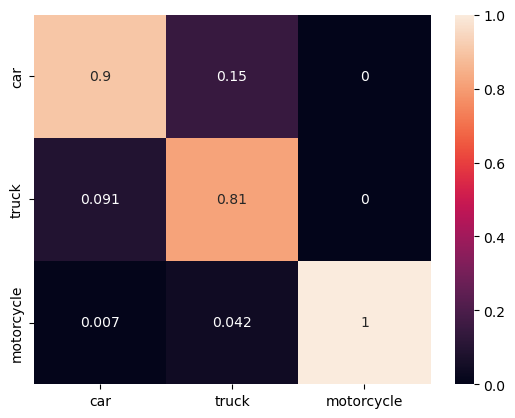

In [58]:
import seaborn as sns
sns_heatmap = sns.heatmap(result, annot=True,  xticklabels=['car', 'truck', 'motorcycle'], yticklabels=['car', 'truck', 'motorcycle'])
fig = sns_heatmap.get_figure()
fig.savefig("figures/out.png") 